# BigMart Data Analysis and Prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Hypothesis Generation

### Item Features

Item features play a vital role in the number of sales of the item. The higher the quality and the more attractive the item is, the more sales it generates.

- **Item_Identifier**: Some items may do exceptionally well with sales due to marketing reasons or other features that are not recoded here. Some items may perform much better in selected outlets.
- **Item_Weight**: The heavier the item, the more cheaper it becomes by unit mass. Thus it generates more sales.
- **Item_Fat_Content**: More fat means a tastier product and this can lead to higher sales. The majority prefer a tastier product rather than a healthier product (This may change according to the <ins>*outlet location*</ins>. High tier locations have educated people who prefer healthier products)
- **Item_Visibility**: There is a positive correlation between visibility and sales. Some <ins>*item types*</ins> may be more visible than others.
- **Item_Type**: Some types are must have staples at homes, so they generate more sales. Also, some types are going to have a higher <ins>*MRP*</ins>
- **Item_MRP**: The cheaper the item, the more sale it generates. But some <ins>*types*</ins> generate more sales, when they are more expensive like "household" and "health and hygiene", because it implies a product has better quality. Plus, an item with high <ins>*visibility*</ins> (has a special shelf or is being advertised) and high price may generate high sales.

### Outlet Features

Outlets have different strategies to generate more sales for its items and each outlet has customers with different buying habits.

- **Outlet_Identifier**: Some outlets may do exceptionally well with sales due to marketing reasons or other features that are not recorded here.
- **Outlet_Establishment_year**: Older outlets may have better reputation with customers, so they generate higher sales. New outlets may perform better in high <ins>*tier locations*</ins>.
- **Outlet_Size**: The <ins>*visibility*</ins> of products may decrease in bigger outlets, geenrating less sales for each product.
- **Outlet_Locations_Type**: The location may generate higher sales for some <ins>*item types*</ins> and may have higher prices (<ins>*MRP*</ins>).
- **Outlet_Type**: Each type may include high <ins>*item types*</ins> than other outlets.

## Package and Data Loading

In [3]:
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("./Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


### Data cleaning

#### Make all column names lowercase

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

#### Fat content has no naming convention

In [7]:
df["item_fat_content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
df["item_fat_content"] = df["item_fat_content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"})
df["item_fat_content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Handling Outliers

<AxesSubplot:>

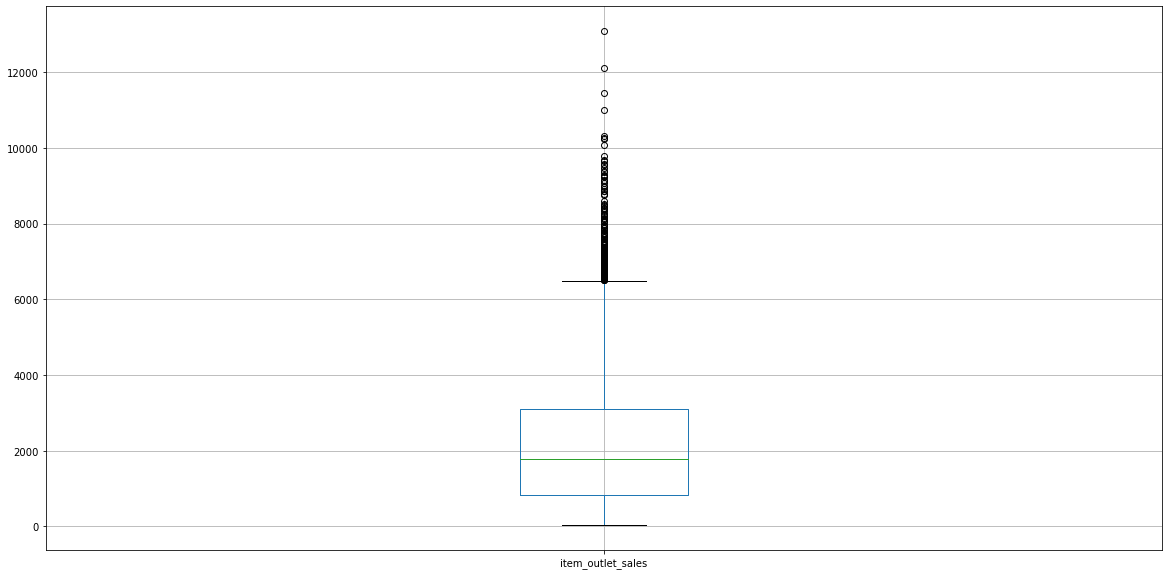

In [9]:
plt.figure(figsize=(20,10))
df.boxplot(column="item_outlet_sales")

<AxesSubplot:>

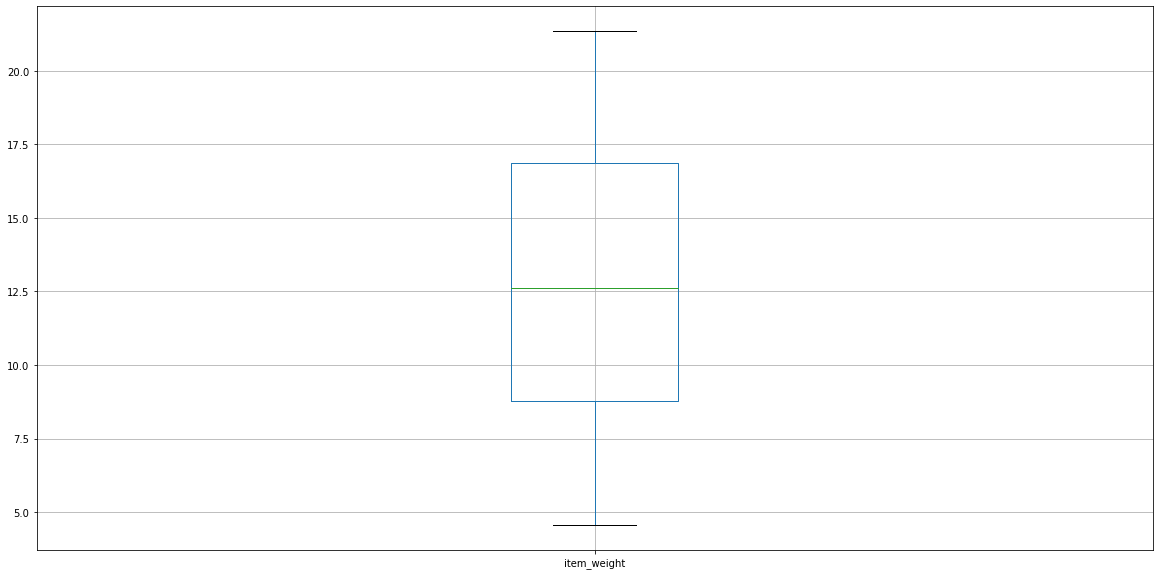

In [10]:
plt.figure(figsize=(20,10))
df.boxplot(column="item_weight")

Visibility large numbers are not considered outliers as they are logical numbers. A product to have *0.30*% visibility is normal

<AxesSubplot:>

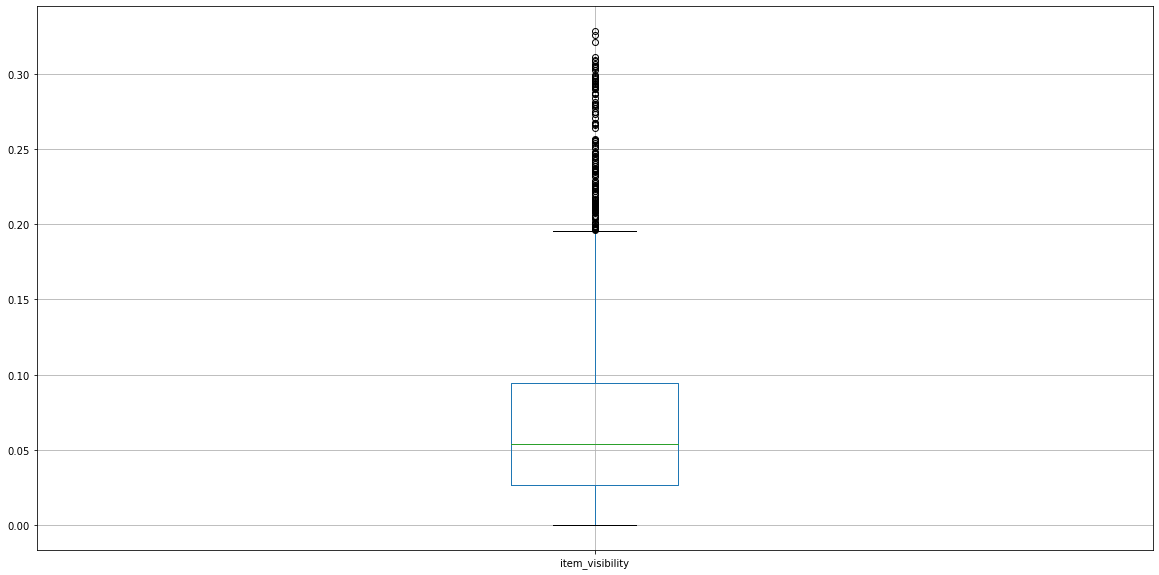

In [11]:
plt.figure(figsize=(20,10))
df.boxplot(column="item_visibility")

<AxesSubplot:>

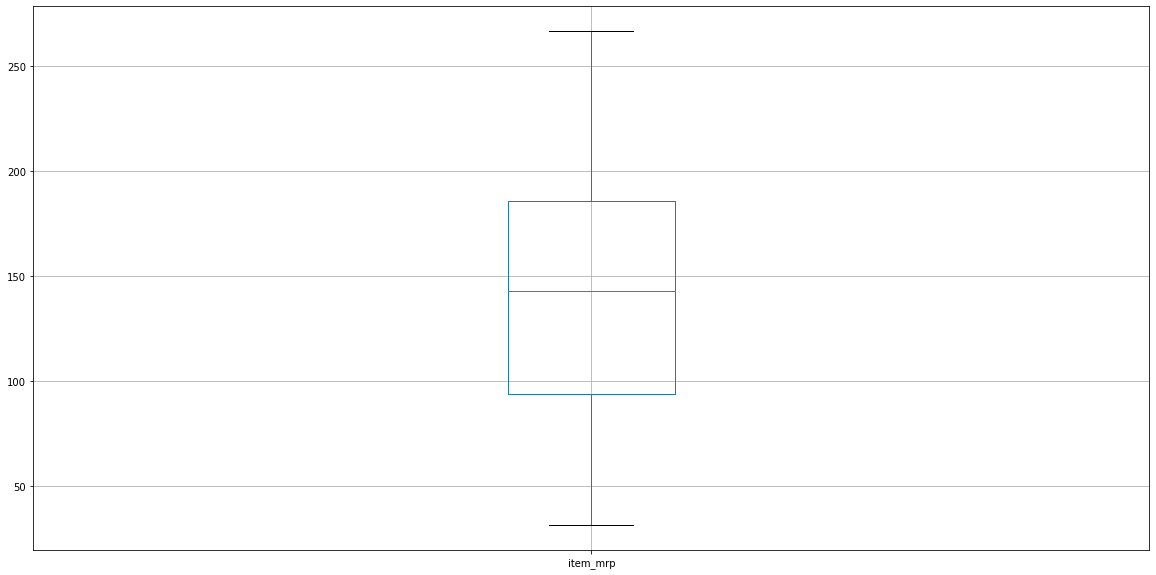

In [12]:
plt.figure(figsize=(20,10))
df.boxplot(column="item_mrp")

### Data Content

In [13]:
df["item_identifier"].unique().shape

(1559,)

In [14]:
df["outlet_identifier"].unique().shape

(10,)

- Item weights range from *4.5* kg to *21* kg
- *Some items are not visible (visibility = 0)* ??
- The most visible item allocates *33%* of the whole store

In [15]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Outlets

In [16]:
outlet_year = df.groupby("outlet_identifier")["outlet_establishment_year"].unique().map(lambda x: x[0]).sort_values()
outlet_year

outlet_identifier
OUT019    1985
OUT027    1985
OUT013    1987
OUT046    1997
OUT010    1998
OUT049    1999
OUT045    2002
OUT035    2004
OUT017    2007
OUT018    2009
Name: outlet_establishment_year, dtype: int64

All outlets have nearly 900 items except for two outlets *OUT010* & *OUT019*

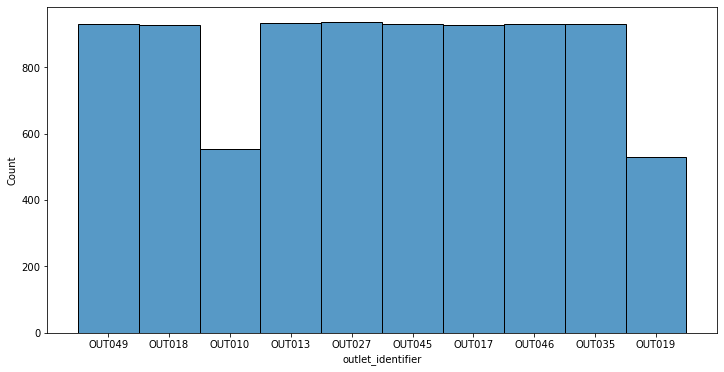

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(df["outlet_identifier"]);

In [18]:
df["outlet_size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [19]:
df["outlet_size"] = pd.Categorical(df["outlet_size"], ["Small", "Medium", "High"], ordered=True)
df["outlet_size"].unique()

['Medium', NaN, 'High', 'Small']
Categories (3, object): ['Small' < 'Medium' < 'High']

In [20]:
df["outlet_location_type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [21]:
df["outlet_location_type"] = pd.Categorical(df["outlet_location_type"], ["Tier 3", "Tier 2", "Tier 1"], ordered=True)
df["outlet_location_type"].unique()

['Tier 1', 'Tier 3', 'Tier 2']
Categories (3, object): ['Tier 3' < 'Tier 2' < 'Tier 1']

In [22]:
df["outlet_type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

3 outlet sizes are not known

In [23]:
outlet_sizes = df.groupby("outlet_identifier")["outlet_size"].unique().map(lambda x: x[0]).sort_values()
outlet_sizes

outlet_identifier
OUT013      High
OUT018    Medium
OUT027    Medium
OUT049    Medium
OUT019     Small
OUT035     Small
OUT046     Small
OUT010       NaN
OUT017       NaN
OUT045       NaN
Name: outlet_size, dtype: object

In [24]:
outlet_location = df.groupby("outlet_identifier")["outlet_location_type"].unique().map(lambda x: x[0]).sort_values()
outlet_location

outlet_identifier
OUT019    Tier 1
OUT046    Tier 1
OUT049    Tier 1
OUT017    Tier 2
OUT035    Tier 2
OUT045    Tier 2
OUT010    Tier 3
OUT013    Tier 3
OUT018    Tier 3
OUT027    Tier 3
Name: outlet_location_type, dtype: object

In [25]:
outlet_type = df.groupby("outlet_identifier")["outlet_type"].unique().map(lambda x: x[0])
outlet_type

outlet_identifier
OUT010        Grocery Store
OUT013    Supermarket Type1
OUT017    Supermarket Type1
OUT018    Supermarket Type2
OUT019        Grocery Store
OUT027    Supermarket Type3
OUT035    Supermarket Type1
OUT045    Supermarket Type1
OUT046    Supermarket Type1
OUT049    Supermarket Type1
Name: outlet_type, dtype: object

In [26]:
pd.concat([outlet_year, outlet_location, outlet_type, outlet_sizes], axis=1)

,outlet_establishment_year,outlet_location_type,outlet_type,outlet_size
outlet_identifier,,,,
OUT019,1985,Tier 1,Grocery Store,Small
OUT027,1985,Tier 3,Supermarket Type3,Medium
OUT013,1987,Tier 3,Supermarket Type1,High
OUT046,1997,Tier 1,Supermarket Type1,Small
OUT010,1998,Tier 3,Grocery Store,NaN
OUT049,1999,Tier 1,Supermarket Type1,Medium
OUT045,2002,Tier 2,Supermarket Type1,NaN
OUT035,2004,Tier 2,Supermarket Type1,Small
OUT017,2007,Tier 2,Supermarket Type1,NaN


#### Item types

In [27]:
df["item_type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [28]:
df["item_type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64

In [29]:
df.shape

(8523, 12)

Search for duplicates

In [30]:
df[df.duplicated()].any().any()

C:\Users\miker\AppData\Local\Temp/ipykernel_19360/4273821153.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'bool_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df.duplicated()].any().any()


False

### Univariate Analysis

Item weights is normally distributed

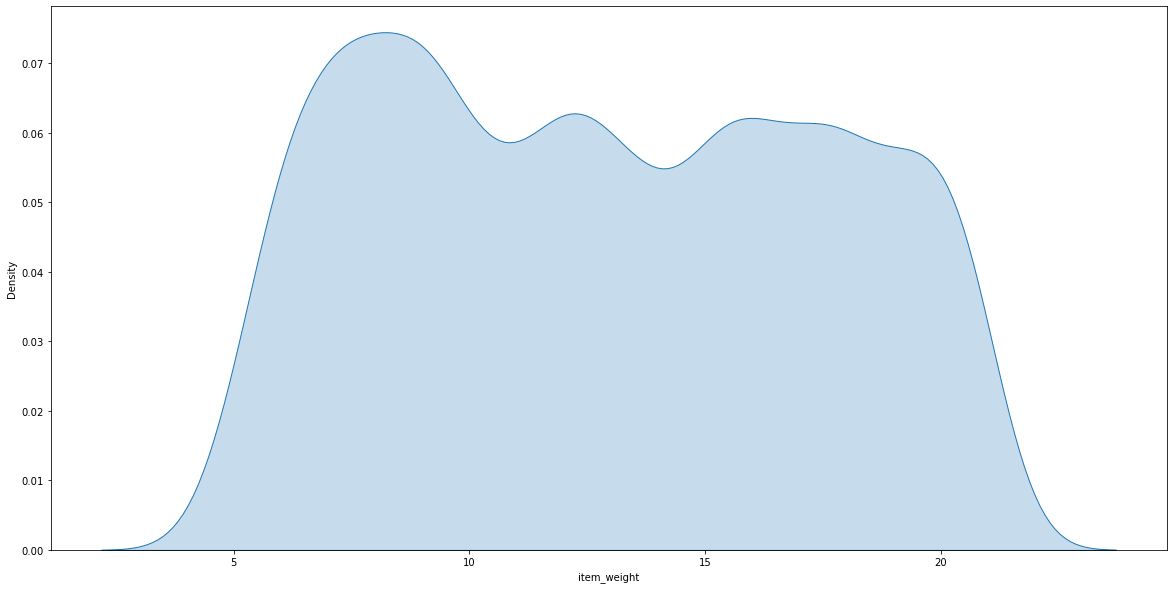

In [31]:
plt.figure(figsize=(20,10))
sns.kdeplot(df["item_weight"], shade=True);

There is more low fat items than regular items

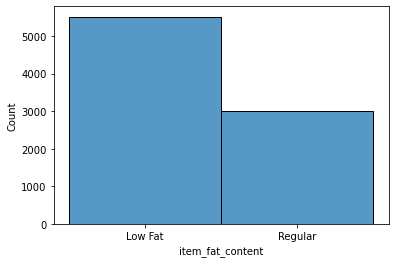

In [32]:
sns.histplot(df["item_fat_content"]);

MRP is normally distributed

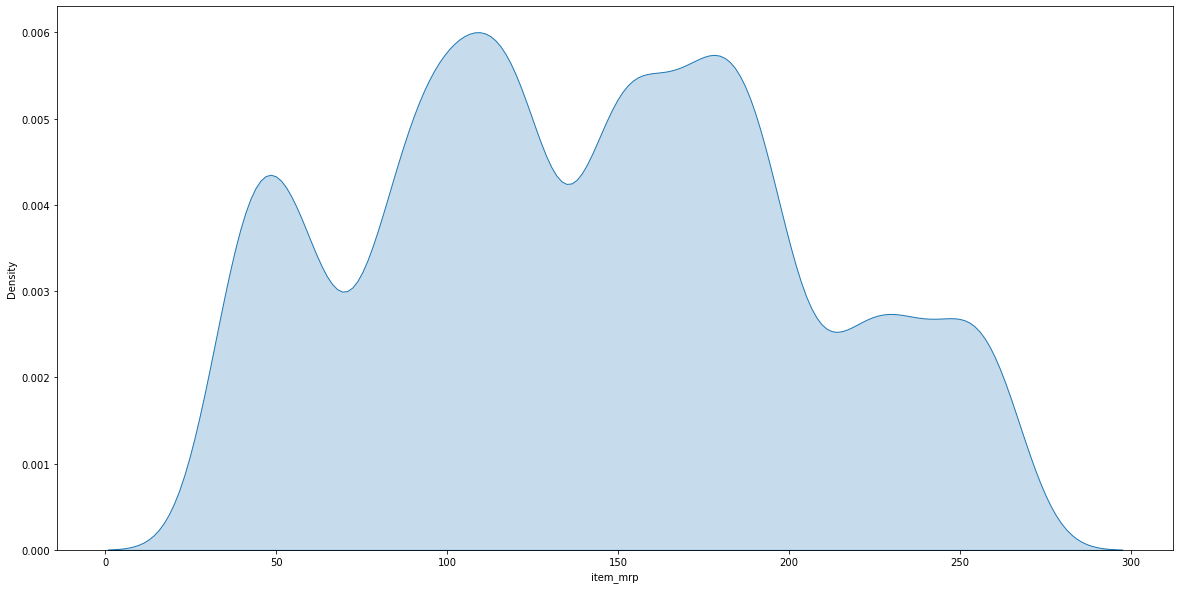

In [33]:
plt.figure(figsize=(20,10))
sns.kdeplot(df["item_mrp"], shade=True);

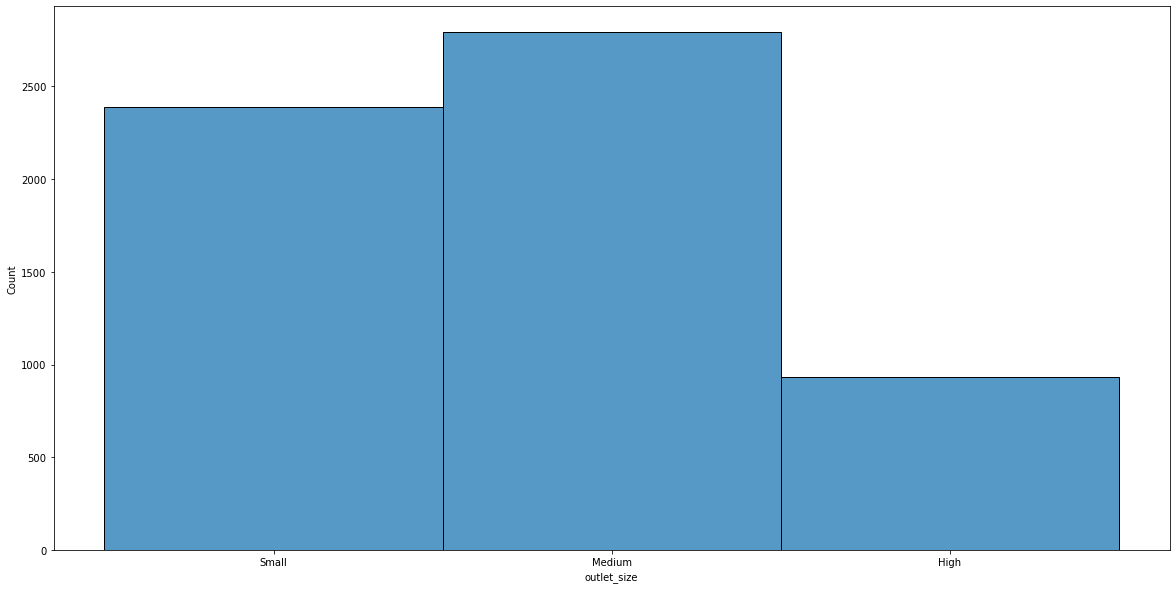

In [34]:
plt.figure(figsize=(20,10))
sns.histplot(df["outlet_size"]);

Tier 1 locations have the least amount of items

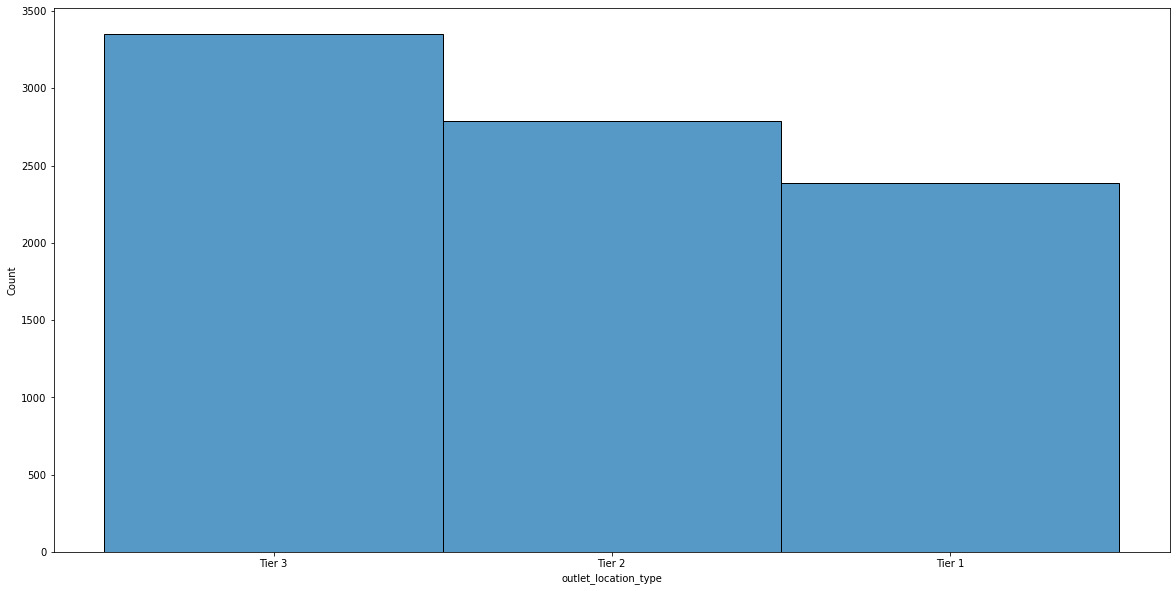

In [35]:
plt.figure(figsize=(20,10))
sns.histplot(df["outlet_location_type"]);

### Bivariate Analysis

There isn't any strong correlation between numerical variables and each other except for *item_mrp* and target variable. This normal because the more expernsive the item, the more sales it will generate. This doesn't mean that the quantity sold increases

In [36]:
df.corr()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
item_weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
item_visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
item_mrp,0.027141,-0.001315,1.000000,0.005020,0.567574
outlet_establishment_year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
item_outlet_sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


- Item weight has no direct realtion with target variable
- item visibility decreases sales as it increases

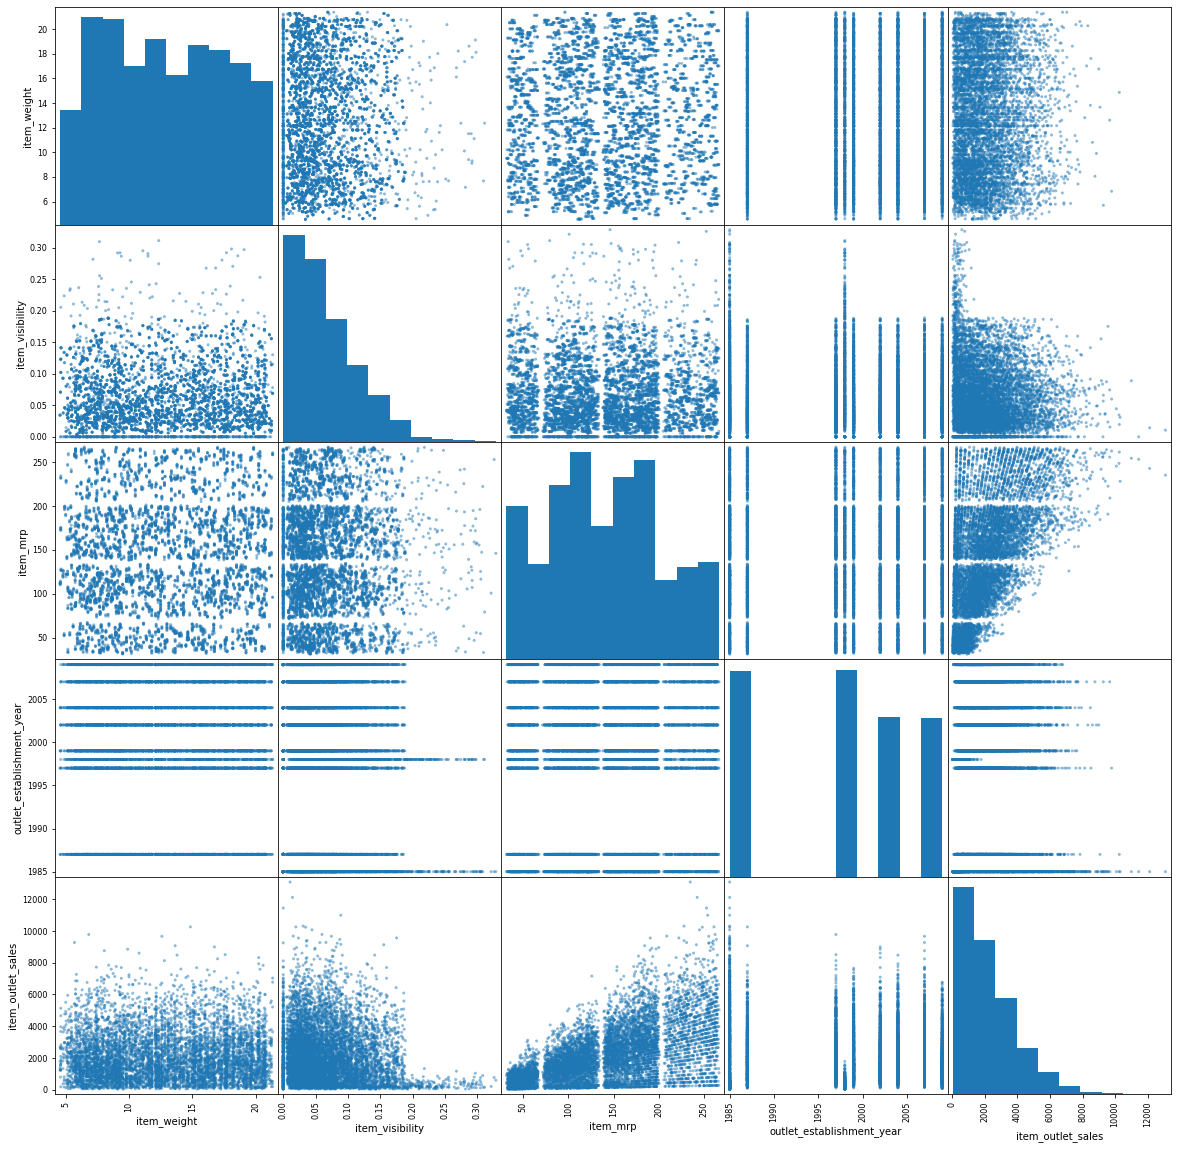

In [37]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

Fat content does not affect sales

In [38]:
df.groupby(["item_fat_content", "outlet_location_type"])["item_outlet_sales"].mean()

item_fat_content  outlet_location_type
Low Fat           Tier 3                  2278.856201
                  Tier 2                  2285.675574
                  Tier 1                  1836.848815
Regular           Tier 3                  2281.042629
                  Tier 2                  2395.006755
                  Tier 1                  1949.660256
Name: item_outlet_sales, dtype: float64

In [39]:
df.groupby("item_type")["item_visibility"].mean().sort_values()

item_type
Health and Hygiene       0.055216
Others                   0.060241
Household                0.061322
Meat                     0.062284
Soft Drinks              0.063972
Hard Drinks              0.064943
Frozen Foods             0.065645
Breads                   0.066255
Snack Foods              0.066850
Starchy Foods            0.067564
Canned                   0.068129
Fruits and Vegetables    0.068513
Baking Goods             0.069169
Dairy                    0.072427
Seafood                  0.074976
Breakfast                0.085723
Name: item_visibility, dtype: float64

In [40]:
df.groupby("item_type")["item_outlet_sales"].mean().sort_values()

item_type
Others                   1926.139702
Baking Goods             1952.971207
Soft Drinks              2006.511735
Health and Hygiene       2010.000265
Breakfast                2111.808651
Frozen Foods             2132.867744
Hard Drinks              2139.221622
Meat                     2158.977911
Breads                   2204.132226
Canned                   2225.194904
Dairy                    2232.542597
Household                2258.784300
Snack Foods              2277.321739
Fruits and Vegetables    2289.009592
Seafood                  2326.065928
Starchy Foods            2374.332773
Name: item_outlet_sales, dtype: float64

In [41]:
df.groupby("item_type")["item_mrp"].mean().sort_values()

item_type
Baking Goods             126.380766
Health and Hygiene       130.818921
Soft Drinks              131.492506
Others                   132.851430
Hard Drinks              137.077928
Frozen Foods             138.503366
Canned                   139.763832
Meat                     139.882032
Breads                   140.952669
Breakfast                141.788151
Seafood                  141.841719
Fruits and Vegetables    144.581235
Snack Foods              146.194934
Starchy Foods            147.838023
Dairy                    148.499208
Household                149.424753
Name: item_mrp, dtype: float64

Tier 2 locations were established in 2000s and tier 1 between 1995 and 2000

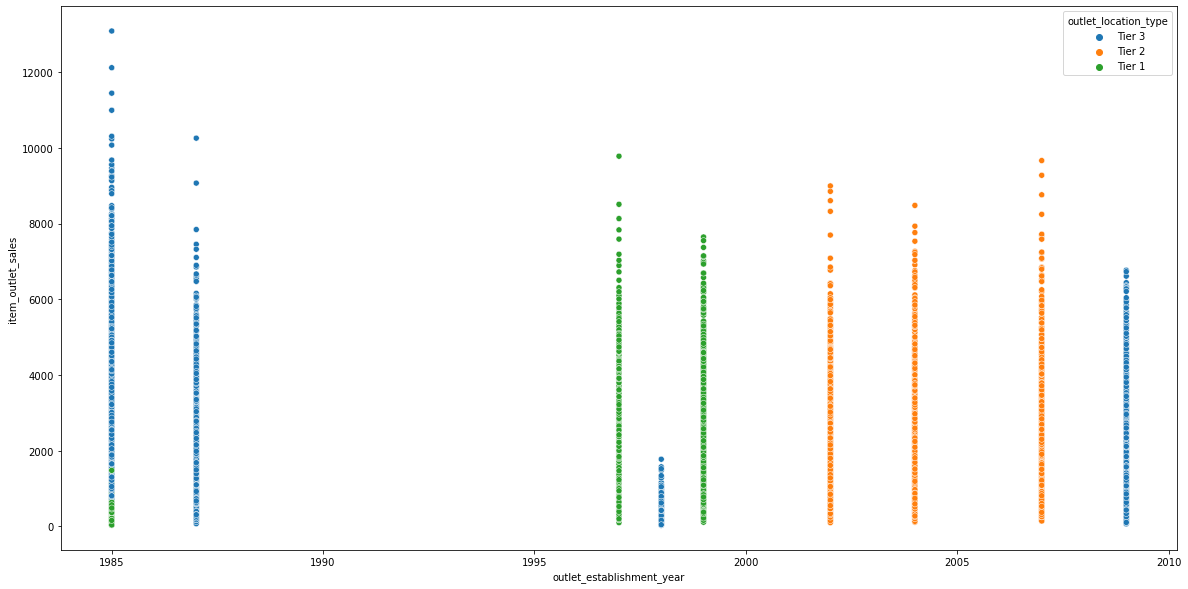

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="outlet_establishment_year", y="item_outlet_sales", hue="outlet_location_type");

Small outlets have items with higher visibility but smaller sales

In [43]:
df.groupby("outlet_size")[["item_visibility", "item_outlet_sales"]].mean()

,item_visibility,item_outlet_sales
outlet_size,,
Small,0.071383,1912.149161
Medium,0.060142,2681.603542
High,0.059957,2298.995256


*OUT027* does exceptionally well with sales

In [44]:
pd.concat([df.groupby(["outlet_identifier"])[["item_visibility", "item_mrp", "item_outlet_sales"]].mean(), outlet_sizes], axis=1).sort_values(by="outlet_size")

,item_visibility,item_mrp,item_outlet_sales,outlet_size
outlet_identifier,,,,
OUT013,0.059957,141.425982,2298.995256,High
OUT018,0.061014,141.678634,1995.498739,Medium
OUT027,0.058615,139.801791,3694.038558,Medium
OUT049,0.060806,140.297699,2348.354635,Medium
OUT019,0.108441,139.787088,340.329723,Small
OUT035,0.061263,143.122481,2438.841866,Small
OUT046,0.060464,142.057387,2277.844267,Small
OUT010,0.101457,140.777594,339.351662,NaN
OUT017,0.061377,139.421119,2340.675263,NaN


In [45]:
pd.concat([df.groupby("outlet_identifier")["item_visibility"].sum(), outlet_sizes], axis=1).sort_values(by="outlet_size")

,item_visibility,outlet_size
outlet_identifier,,
OUT013,55.879859,High
OUT018,56.621454,Medium
OUT027,54.804764,Medium
OUT049,56.549156,Medium
OUT019,57.257041,Small
OUT035,56.974873,Small
OUT046,56.231875,Small
OUT010,56.308832,NaN
OUT017,56.834646,NaN


The location has no effect on mrp, but tier 1 generates the least sales

In [46]:
df.groupby("outlet_location_type")[["item_mrp", "item_outlet_sales"]].mean()

,item_mrp,item_outlet_sales
outlet_location_type,,
Tier 3,140.935232,2279.627651
Tier 2,141.167196,2323.990559
Tier 1,140.870106,1876.909159


## Missing Value Treatement

In [47]:
df.isnull().any()

item_identifier              False
item_weight                   True
item_fat_content             False
item_visibility              False
item_type                    False
item_mrp                     False
outlet_identifier            False
outlet_establishment_year    False
outlet_size                   True
outlet_location_type         False
outlet_type                  False
item_outlet_sales            False
dtype: bool

#### Item visibility = 0

Products take about *50*% of outlet area

In [48]:
df.groupby("outlet_identifier")["item_visibility"].sum()

outlet_identifier
OUT010    56.308832
OUT013    55.879859
OUT017    56.834646
OUT018    56.621454
OUT019    57.257041
OUT027    54.804764
OUT035    56.974873
OUT045    56.180780
OUT046    56.231875
OUT049    56.549156
Name: item_visibility, dtype: float64

In [49]:
"Percentage of none visible items: " + str(round(
    (df[df["item_visibility"] == 0].shape[0] / df.shape[0]) * 100
    )) + "%"

'Percentage of none visible items: 6%'

Visibility = 0 does not seem to be affected by any other features.

<AxesSubplot:xlabel='item_weight', ylabel='Density'>

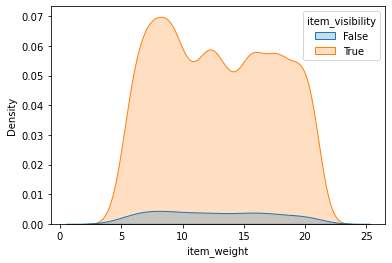

In [50]:
sns.kdeplot(df["item_weight"], hue=df["item_visibility"].gt(0), shade=True)

In [51]:
visibility_df = df[["item_identifier", "item_type", "outlet_identifier", "item_visibility"]].copy()
visibility_df["is_visible"] = df["item_visibility"].gt(0)
visibility_df.groupby("outlet_identifier")["is_visible"].mean().sort_values()

outlet_identifier
OUT018    0.929957
OUT046    0.934409
OUT027    0.935829
OUT013    0.936695
OUT045    0.937567
OUT017    0.938445
OUT035    0.941935
OUT049    0.943011
OUT019    0.943182
OUT010    0.947748
Name: is_visible, dtype: float64

In [52]:
visibility_df.groupby("item_identifier")["is_visible"].mean().sort_values()

item_identifier
FDY07    0.428571
FDU43    0.500000
NCD07    0.500000
FDZ50    0.500000
FDU35    0.500000
           ...   
FDC11    1.000000
FDQ01    1.000000
FDP59    1.000000
FDC10    1.000000
FDQ08    1.000000
Name: is_visible, Length: 1559, dtype: float64

In [53]:
visibility_df.groupby("item_type")["is_visible"].mean().sort_values()

item_type
Starchy Foods            0.898649
Hard Drinks              0.920561
Soft Drinks              0.923596
Fruits and Vegetables    0.929383
Baking Goods             0.930556
Breads                   0.932271
Health and Hygiene       0.936538
Seafood                  0.937500
Frozen Foods             0.940421
Others                   0.940828
Snack Foods              0.943333
Household                0.943956
Dairy                    0.944282
Canned                   0.949153
Meat                     0.952941
Breakfast                0.972727
Name: is_visible, dtype: float64

In [54]:
df.query("item_identifier == 'FDY07'")["item_type"].unique()

array(['Fruits and Vegetables'], dtype=object)

Mean sales for visible items: 2178.5754445667235
Mean sales for visible items: 2222.5429281368824


<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

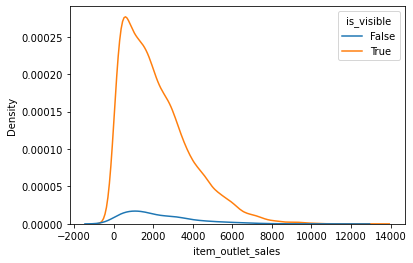

In [55]:
print("Mean sales for visible items: " + str(df.loc[visibility_df["is_visible"], "item_outlet_sales"].mean()))
print("Mean sales for visible items: " + str(df.loc[~visibility_df["is_visible"], "item_outlet_sales"].mean()))
sns.kdeplot(df["item_outlet_sales"], hue=visibility_df["is_visible"])

Each item has approximately the same visibility in each outlet

In [56]:
df.groupby("item_identifier")["item_visibility"].unique()

item_identifier
DRA12    [0.041177505, 0.0, 0.040911824, 0.041112694, 0...
DRA24    [0.040154087, 0.069909188, 0.066831682, 0.0397...
DRA59    [0.127927931, 0.128126825, 0.127821472, 0.0, 0...
DRB01              [0.082367244, 0.082170947, 0.081841136]
DRB13    [0.007084185, 0.007043008, 0.01179078, 0.00703...
                               ...                        
NCZ30    [0.043828293, 0.026163192, 0.026180032, 0.0, 0...
NCZ41    [0.064367627, 0.064409056, 0.064551885, 0.0647...
NCZ42    [0.0, 0.011351778, 0.011278535, 0.011285795, 0...
NCZ53    [0.024576875, 0.024358634, 0.024456797, 0.0409...
NCZ54    [0.0, 0.082955719, 0.083528446, 0.083359391, 0...
Name: item_visibility, Length: 1559, dtype: object

To impute visibility 0, replace 0 visibility with the average item visibility across all outlets

In [57]:
avg_item_visibility = df.groupby("item_identifier")["item_visibility"].unique().map(lambda item: item[item != 0].mean())
df["item_visibility"] = df.apply(lambda row: avg_item_visibility.loc[row["item_identifier"]] if row["item_visibility"] == 0 else row["item_visibility"], axis=1)
df.groupby("item_identifier")["item_visibility"].unique()

item_identifier
DRA12    [0.041177505, 0.0479342655, 0.040911824, 0.041...
DRA24    [0.040154087, 0.069909188, 0.066831682, 0.0397...
DRA59    [0.127927931, 0.128126825, 0.127821472, 0.1539...
DRB01              [0.082367244, 0.082170947, 0.081841136]
DRB13    [0.007084185, 0.007043008, 0.01179078, 0.00703...
                               ...                        
NCZ30    [0.043828293, 0.026163192, 0.026180032, 0.0291...
NCZ41    [0.064367627, 0.064409056, 0.064551885, 0.0647...
NCZ42    [0.01130539675, 0.011351778, 0.011278535, 0.01...
NCZ53    [0.024576875, 0.024358634, 0.024456797, 0.0409...
NCZ54    [0.09383050716666667, 0.082955719, 0.083528446...
Name: item_visibility, Length: 1559, dtype: object

Visibility distribution is right-skewed

<AxesSubplot:xlabel='item_visibility', ylabel='Density'>

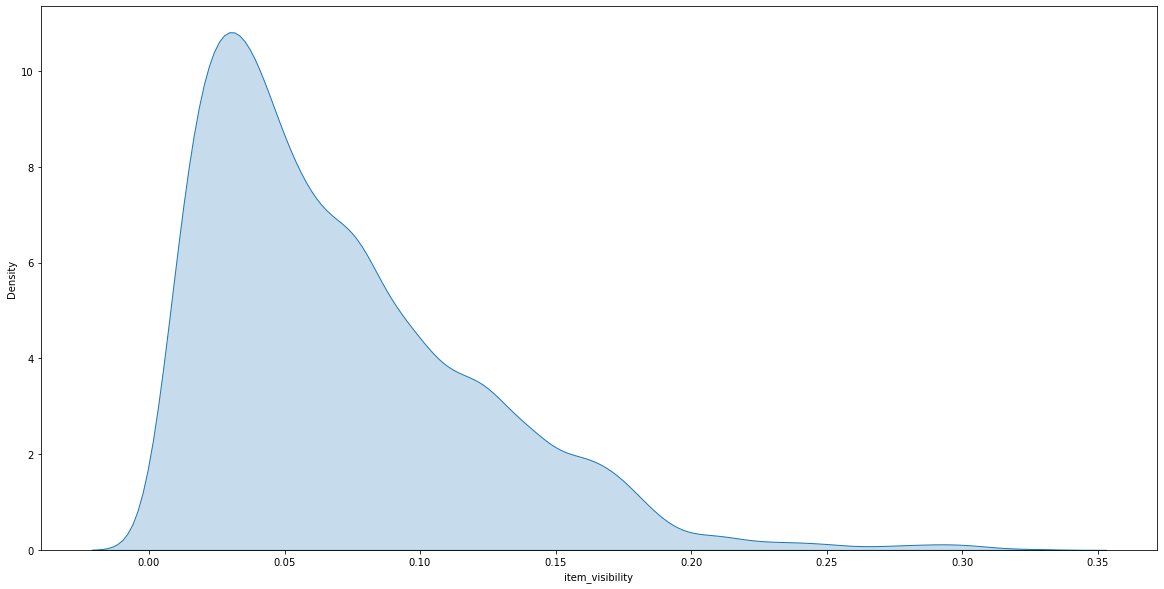

In [58]:
plt.figure(figsize=(20,10))
sns.kdeplot(df["item_visibility"], shade=True)

### NaN Outlet Sizes

Since we are not sure from our outlet size missing values imputation, we will add a *outlet_size_missing* column

In [59]:
df["is_outlet_size_missing"] = df["outlet_size"].isnull()
df["is_outlet_size_missing"].sum()

2410

Since OUT010 and OUT019 have around 500 items, they are both grocery stores and OUT019 is small then we deduce that OUT010 is also small

In [60]:
df.loc[df["outlet_identifier"] == "OUT010", "outlet_size"]= "Small"
df.query("outlet_identifier == 'OUT010'")["outlet_size"].unique()

['Small']
Categories (3, object): ['Small' < 'Medium' < 'High']

<AxesSubplot:xlabel='outlet_size', ylabel='Count'>

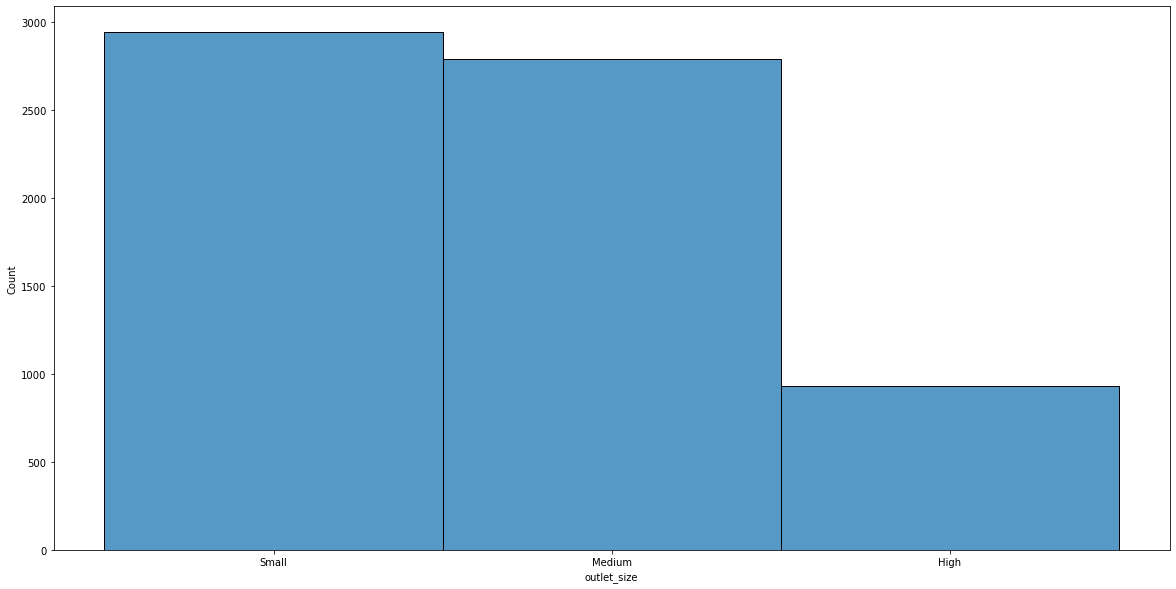

In [61]:
plt.figure(figsize=(20,10))
sns.histplot(df["outlet_size"])

We will impute that the missing outlet sizes are high since there is only one high size

In [62]:
df.loc[df["outlet_size"].isnull(), "outlet_size"] = "High"
df["outlet_size"].isnull().any()

False

### NaN Item Weight

Each item has only one weight, so get the missing weight from another row with the same item identifier

In [63]:
item_weights = df.groupby("item_identifier")["item_weight"].unique().map(lambda x: x[~np.isnan(x)].item(0) if x[~np.isnan(x)].shape[0] > 0 else 0)
f"No. of items with no recorded weight {str((~item_weights.gt(0)).sum())}"

'No. of items with no recorded weight 4'

In [64]:
df["item_weight"] = df.apply(lambda row: item_weights.loc[row["item_identifier"]] if np.isnan(row["item_weight"]) else row["item_weight"], axis=1)
df["item_weight"].isnull().any()

False

In [65]:
(~df["item_weight"].gt(0)).sum()

4

In [66]:
df.drop(df[~df["item_weight"].gt(0)].index, inplace=True)
(~df["item_weight"].gt(0)).sum()

0

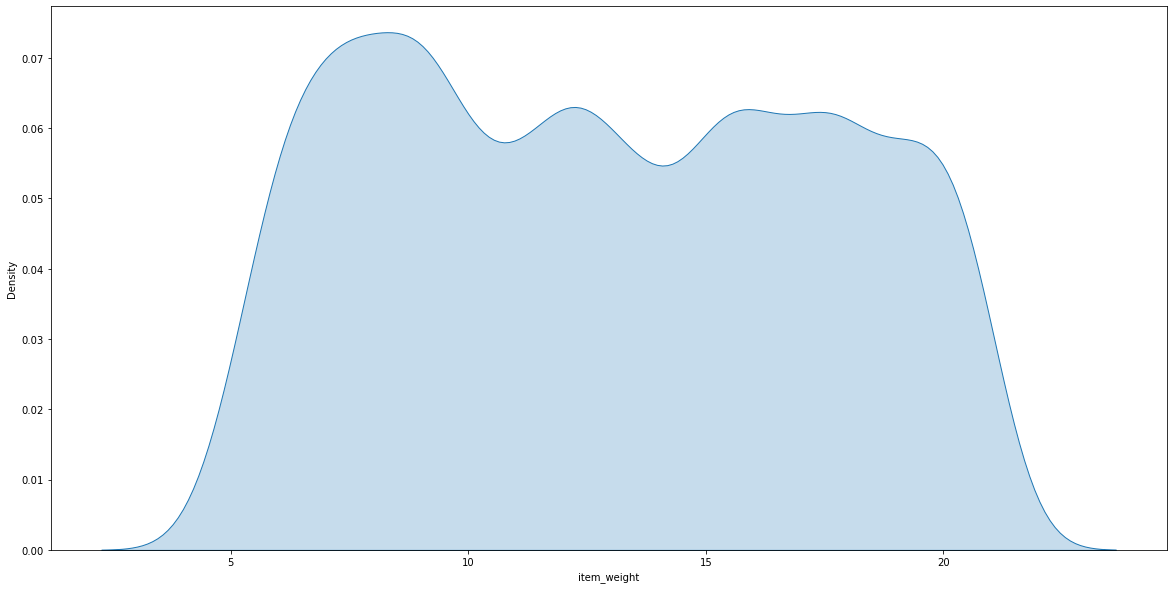

In [67]:
plt.figure(figsize=(20,10))
sns.kdeplot(df["item_weight"], shade=True);

## Feature Engineering

In [68]:
X = df.copy()
y = X.pop("item_outlet_sales")

In [69]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

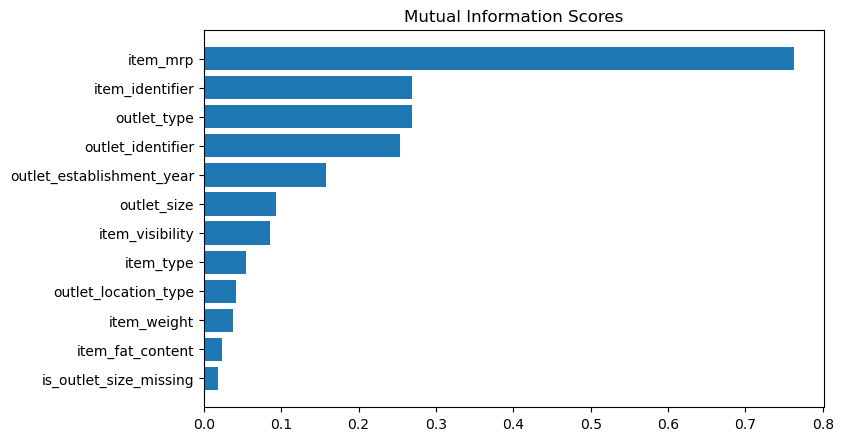

In [70]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(make_mi_scores(X, y))

### Preprocessing

In [71]:
X.pop("item_identifier")
X.join(pd.get_dummies(df["item_identifier"]).iloc[:, :-1])

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,...,NCY54,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,0,0
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
3,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,...,0,0,0,0,0,0,0,0,0,0
4,8.930,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
numerical_cols = ["item_weight", "item_visibility", "item_mrp", "outlet_establishment_year"]
ordinal_cols = ["outlet_size", "outlet_location_type"]
nominal_cols = ["item_fat_content", "item_type", "outlet_identifier", "outlet_type"]
preprocessor = ColumnTransformer(transformers=[
    ('numerical_transformer', MinMaxScaler(), numerical_cols),
    ('ordinal_transformer', OrdinalEncoder(), ordinal_cols),
    ('nominal_transformer', OneHotEncoder(), nominal_cols)
])

## Modeling

In [74]:
def train_predict(learner):
    """Train ML model and print the time it took to train it and return its score

    Params:
        learner: Machine learning model

    return:
        score: The mean absolute error of the learner
        model: final model after fitting and preprocessing
    """
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', learner)
    ])
    start = time()
    model.fit(X_train, y_train)
    end = time()
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_test, y_pred)
    print(f"{learner.__class__.__name__} model took {end - start} seconds to train for {round(score)} absolute mean error")
    return (score, model)

### Linear Regression

All our features are normalized so no nee to use y-intercept

In [75]:
learner = LinearRegression(fit_intercept=False)
learner = train_predict(learner)

LinearRegression model took 0.10097575187683105 seconds to train for 842 absolute mean error


### Random Forest

In [76]:
learner = RandomForestRegressor()
learner = train_predict(learner)

RandomForestRegressor model took 45.90876126289368 seconds to train for 802 absolute mean error
